# Causal impact

Install

In [ ]:
!pip install tfcausalimpact

Import

In [2]:
import pandas as pd
from causalimpact import CausalImpact
import numpy as np
import matplotlib.pyplot as plt

Generate dataset

In [3]:
np.random.seed(123)
data = pd.DataFrame()
data["Y"] = np.linspace(0,50,100) + 10 * np.sin(0.5 * np.arange(0,100)) + 5 * np.random.rand(100) + 40
data["X"] = [y - 40 + 5 * np.random.rand() for y in data["Y"]]
print(data.shape)
data.head()

(100, 2)


Y          X
0  43.482346   6.047987
1  46.730003  10.063125
2  50.559068  11.088611
3  54.246675  14.901150
4  54.710521  16.320424

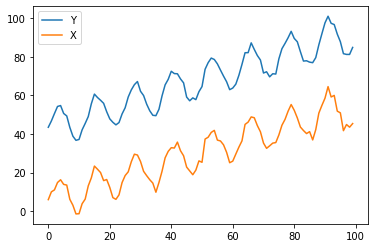

In [4]:
plt.figure()
plt.plot(data["Y"], label = "Y")
plt.plot(data["X"], label = "X")
plt.legend()
plt.show()

Simulate the treatment effect

In [5]:
event_day = 70
data.iloc[event_day:, 0] += 20

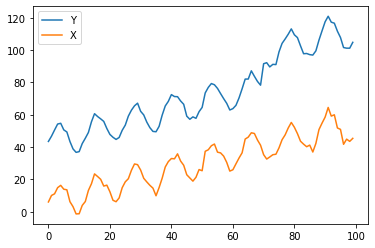

In [6]:
plt.figure()
plt.plot(data["Y"], label = "Y")
plt.plot(data["X"], label = "X")
plt.legend()
plt.show()

In [7]:
pre_period = [0, event_day -1]
post_period = [event_day, 99]

Causal analysis

In [ ]:
ci = CausalImpact(data, pre_period, post_period)

Show results

In [9]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    103.86             3115.73
Prediction (s.d.)         81.89 (1.69)       2456.82 (50.79)
95% CI                    [78.61, 85.25]     [2358.28, 2557.36]

Absolute effect (s.d.)    21.96 (1.69)       658.91 (50.79)
95% CI                    [18.61, 25.25]     [558.37, 757.45]

Relative effect (s.d.)    26.82% (2.07%)     26.82% (2.07%)
95% CI                    [22.73%, 30.83%]   [22.73%, 30.83%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [10]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 103.86. By contrast, in the absence of an
intervention, we would have expected an average response of 81.89.
The 95% interval of this counterfactual prediction is [78.61, 85.25].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 21.96 with a 95% interval of
[18.61, 25.25]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3115.73.
By contrast, had the intervention not taken place, we would have expected
a sum of 2456.82. The 95% interval of this prediction is [2358.28, 2557.36].


The above results are given in terms of absolute numbers. In relative
terms, the response v

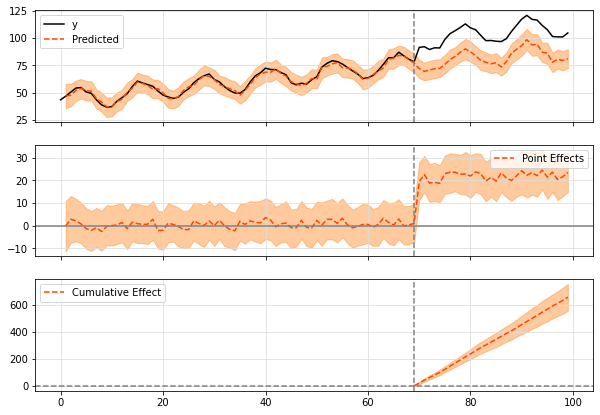

In [11]:
ci.plot()